In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [23]:
file_path = 'C:/Users/Saniya Firdous/Downloads/Diabetic foot.xlsx'  # Update this path if necessary
df = pd.read_excel(file_path)
print(df.head())


   SL NO  Unnamed: 1  CASE  Gender  Age  Duration of DM  Family H/O DM  \
0      1         NaN     1  Female   62             24.0            No   
1      2         NaN     1    Male   66             10.0            No   
2      3         NaN     1    Male   72              7.0            No   
3      4         NaN     1    Male   60             16.0            No   
4      5         NaN     1    Male   39              6.0           Yes   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  FBS  Unnamed: 11  HbA1C  \
0         NaN         NaN         NaN  129          NaN   6.85   
1         NaN         NaN         NaN  133          NaN   9.68   
2         NaN         NaN         NaN  283          NaN   8.53   
3         NaN         NaN         NaN  110          NaN  10.08   
4         NaN         NaN         NaN  106          NaN   7.34   

  ITLN1 SEQUENCING NTN1 SEQUENCING  ITLNI ELISA  NTN1 ELISA   STAGES  
0               GG              GG      125.880      300.74  Grade 4  
1               

In [25]:
df_cleaned = df.drop(columns=['SL NO', 'Unnamed: 1', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 11'])
print(df_cleaned.head())


   CASE  Gender  Age  Duration of DM  Family H/O DM  FBS  HbA1C  \
0     1  Female   62             24.0            No  129   6.85   
1     1    Male   66             10.0            No  133   9.68   
2     1    Male   72              7.0            No  283   8.53   
3     1    Male   60             16.0            No  110  10.08   
4     1    Male   39              6.0           Yes  106   7.34   

  ITLN1 SEQUENCING NTN1 SEQUENCING  ITLNI ELISA  NTN1 ELISA   STAGES  
0               GG              GG      125.880      300.74  Grade 4  
1               GG              GG      136.290      171.25  Grade 3  
2               GG              GG      144.480      213.19  Grade 3  
3               GG              GC      182.490      415.42  Grade 4  
4               GG              GG       80.348      127.95  Grade 1  


In [27]:
df_cleaned['Gender'] = df_cleaned['Gender'].map({'Male': 1, 'Female': 0})
df_cleaned['Family H/O DM'] = df_cleaned['Family H/O DM'].map({'Yes': 1, 'No': 0})
df_cleaned['ITLN1 SEQUENCING'] = df_cleaned['ITLN1 SEQUENCING'].map({'GG': 0, 'GC': 1, 'CC': 2})
df_cleaned['NTN1 SEQUENCING'] = df_cleaned['NTN1 SEQUENCING'].map({'GG': 0, 'GC': 1, 'CC': 2})
print(df_cleaned.head())


   CASE  Gender  Age  Duration of DM   Family H/O DM  FBS  HbA1C  \
0     1       0   62             24.0            0.0  129   6.85   
1     1       1   66             10.0            0.0  133   9.68   
2     1       1   72              7.0            0.0  283   8.53   
3     1       1   60             16.0            0.0  110  10.08   
4     1       1   39              6.0            1.0  106   7.34   

   ITLN1 SEQUENCING  NTN1 SEQUENCING  ITLNI ELISA  NTN1 ELISA   STAGES  
0               0.0              0.0      125.880      300.74  Grade 4  
1               0.0              0.0      136.290      171.25  Grade 3  
2               0.0              0.0      144.480      213.19  Grade 3  
3               0.0              1.0      182.490      415.42  Grade 4  
4               0.0              0.0       80.348      127.95  Grade 1  


In [29]:
severity_mapping = {'Grade 1': 1, 'Grade 2': 2, 'Grade 3': 3, 'Grade 4': 4}
df_cleaned['STAGES'] = df_cleaned['STAGES'].map(severity_mapping)
print(df_cleaned['STAGES'].head())


0    4.0
1    3.0
2    3.0
3    4.0
4    1.0
Name: STAGES, dtype: float64


In [31]:
df_cleaned['Family H/O DM'].fillna(df_cleaned['Family H/O DM'].mode()[0], inplace=True)
df_cleaned['ITLN1 SEQUENCING'].fillna(df_cleaned['ITLN1 SEQUENCING'].mode()[0], inplace=True)
df_cleaned['NTN1 SEQUENCING'].fillna(df_cleaned['NTN1 SEQUENCING'].mode()[0], inplace=True)
print(df_cleaned.isnull().sum())


CASE                  0
Gender                0
Age                   0
Duration of DM        0
Family H/O DM         0
FBS                   0
HbA1C                 0
ITLN1 SEQUENCING      0
NTN1 SEQUENCING       0
ITLNI ELISA           0
NTN1 ELISA            0
STAGES              175
dtype: int64


In [33]:
df_cleaned = df_cleaned.dropna(subset=['STAGES'])
print(df_cleaned.isnull().sum())


CASE                0
Gender              0
Age                 0
Duration of DM      0
Family H/O DM       0
FBS                 0
HbA1C               0
ITLN1 SEQUENCING    0
NTN1 SEQUENCING     0
ITLNI ELISA         0
NTN1 ELISA          0
STAGES              0
dtype: int64


In [35]:
X = df_cleaned.drop(columns=['STAGES'])
y = df_cleaned['STAGES']
print(X.head())
print(y.head())


   CASE  Gender  Age  Duration of DM   Family H/O DM  FBS  HbA1C  \
0     1       0   62             24.0            0.0  129   6.85   
1     1       1   66             10.0            0.0  133   9.68   
2     1       1   72              7.0            0.0  283   8.53   
3     1       1   60             16.0            0.0  110  10.08   
4     1       1   39              6.0            1.0  106   7.34   

   ITLN1 SEQUENCING  NTN1 SEQUENCING  ITLNI ELISA  NTN1 ELISA  
0               0.0              0.0      125.880      300.74  
1               0.0              0.0      136.290      171.25  
2               0.0              0.0      144.480      213.19  
3               0.0              1.0      182.490      415.42  
4               0.0              0.0       80.348      127.95  
0    4.0
1    3.0
2    3.0
3    4.0
4    1.0
Name: STAGES, dtype: float64


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(68, 11) (17, 11)
(68,) (17,)


In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])
print(X_test_scaled[:5])


[[ 0.          0.4152274   1.90171677 -0.23592225 -0.28171808 -0.770195
  -0.65069745  0.         -0.36514837 -0.92323245 -0.74343375]
 [ 0.          0.4152274   0.86441671  2.00259585 -0.28171808 -0.42444258
  -0.9286538   0.         -0.36514837 -1.01152424 -0.40384688]
 [ 0.         -2.40831892  2.36273901 -0.98209495 -0.28171808 -0.65494419
  -1.30731896  0.         -0.36514837  0.31595314 -0.89644209]
 [ 0.         -2.40831892 -0.40339447 -0.23592225  3.54964787  1.10674673
   0.79950955  0.         -0.36514837 -1.00934402  0.47282939]
 [ 0.          0.4152274   1.2101834   1.25642315 -0.28171808  0.87624512
   0.17108651  0.         -0.36514837 -0.01801679 -0.8692047 ]]
[[ 0.         -2.40831892 -0.05762778  0.95795407 -0.28171808  1.78178718
   1.0250973   0.         -0.36514837  0.55818398 -0.36359553]
 [ 0.         -2.40831892  0.40339447  1.85336131 -0.28171808 -0.60555099
  -1.0132492   0.         -0.36514837 -0.18188715  0.34902747]
 [ 0.         -2.40831892 -1.90171677 -1.5

In [41]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [42]:
y_pred = model.predict(X_test_scaled)
print(y_pred[:5])


[3. 3. 2. 3. 3.]


In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class='ovo', average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.4117647058823529
Precision: 0.3792016806722689
Recall: 0.4117647058823529
F1 Score: 0.3770739064856712
ROC AUC Score: 0.6732843137254902
Confusion Matrix:
[[0 2 0 0]
 [0 3 3 0]
 [0 1 3 1]
 [0 1 2 1]]


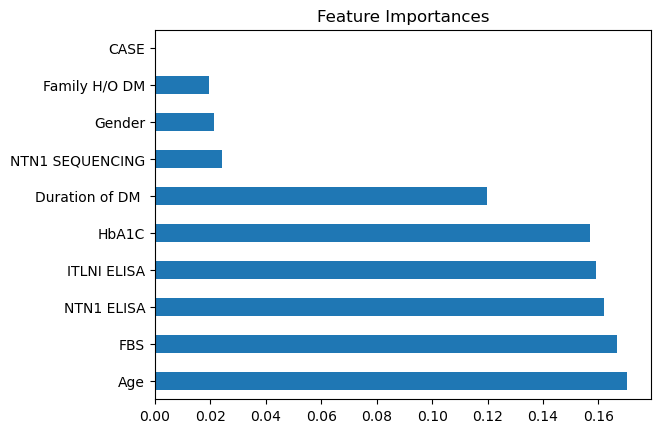

In [47]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importances")
plt.show()


In [48]:
def predict_severity(case, gender, age, duration_of_dm, family_ho_dm, fbs, hba1c, itln1_sequencing, ntn1_sequencing, itlni_elisa, ntn1_elisa):
    input_data = {
        'CASE': [case],
        'Gender': [1 if gender == 'Male' else 0],
        'Age': [age],
        'Duration of DM ': [duration_of_dm],
        'Family H/O DM': [1 if family_ho_dm == 'Yes' else 0],
        'FBS': [fbs],
        'HbA1C': [hba1c],
        'ITLN1 SEQUENCING': [0 if itln1_sequencing == 'GG' else 1 if itln1_sequencing == 'GC' else 2],
        'NTN1 SEQUENCING': [0 if ntn1_sequencing == 'GG' else 1 if ntn1_sequencing == 'GC' else 2],
        'ITLNI ELISA': [itlni_elisa],
        'NTN1 ELISA': [ntn1_elisa]
    }
    
    input_df = pd.DataFrame(input_data)
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    return prediction[0]


In [49]:
def get_user_input():
    case = int(input("Enter Case Number: "))
    gender = input("Enter Gender (Male/Female): ")
    age = int(input("Enter Age: "))
    duration_of_dm = int(input("Enter Duration of DM (in years): "))
    family_ho_dm = input("Family H/O DM (Yes/No): ")
    fbs = float(input("Enter Fasting Blood Sugar (FBS): "))
    hba1c = float(input("Enter HbA1C: "))
    itln1_sequencing = input("Enter ITLN1 SEQUENCING (GG/GC/CC): ")
    ntn1_sequencing = input("Enter NTN1 SEQUENCING (GG/GC/CC): ")
    itlni_elisa = float(input("Enter ITLNI ELISA: "))
    ntn1_elisa = float(input("Enter NTN1 ELISA: "))
    
    user_data = {
        'case': case,
        'gender': gender,
        'age': age,
        'duration_of_dm': duration_of_dm,
        'family_ho_dm': family_ho_dm,
        'fbs': fbs,
        'hba1c': hba1c,
        'itln1_sequencing': itln1_sequencing,
        'ntn1_sequencing': ntn1_sequencing,
        'itlni_elisa': itlni_elisa,
        'ntn1_elisa': ntn1_elisa
    }
    
    return user_data
    


In [53]:
new_patient_data = get_user_input()

predicted_stage = predict_severity(**new_patient_data)
print(f"The predicted severity stage for the new patient is: Grade {predicted_stage}")


Enter Case Number:  1
Enter Gender (Male/Female):  male
Enter Age:  66
Enter Duration of DM (in years):  10
Family H/O DM (Yes/No):  no
Enter Fasting Blood Sugar (FBS):  133
Enter HbA1C:  9.68
Enter ITLN1 SEQUENCING (GG/GC/CC):  gg
Enter NTN1 SEQUENCING (GG/GC/CC):  gg
Enter ITLNI ELISA:  132.29
Enter NTN1 ELISA:  171.25


The predicted severity stage for the new patient is: Grade 3.0
